# Explore Diabetes Data 01
Linking obesity and diabetes directly without data transformation.  
**Author:** Marvin Grimm

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**File Pathes**

In [3]:
# File pathes for quick adjustment if places or directories change.
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')
path_diabetes = os.path.join(path_inter, 'diabetes_refined_data.csv')
path_diabetes_description = os.path.join(path_inter, 'diabetes_refined_decription.csv')

## Refine Diabetes Data  
Extract the required data from the original raw data source and clean or refine it.

**Initial Dataframe**  
We use data provided by:
**United States Department of Agriculture**  
https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version  
This data is provided as an Excel file with multiple sheets.
The values of the food atlas are collected for each US county which are identified by their FIPS-code.

In [4]:
# Load the health table from the food atlas data and extract the columns dealing with obesity.
df_health = pd.read_excel(path_atlas, sheet_name='HEALTH')
df_diabetes = df_health[['FIPS', 'PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13']].copy()

# Show some information about the dataframe we extracted so far.
print('{:<25} {:d}'.format('Number of entries:', len(df_diabetes.index)))
df_diabetes[:5]

Number of entries:        3143


,FIPS,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13
0,1001,11.4,13.0
1,1003,9.8,10.4
2,1005,13.6,18.4
3,1007,11.1,14.8
4,1009,11.4,14.1


In [5]:
# Rename the columns to allow for better reading and referencing in the future.
df_diabetes.rename(columns={'FIPS':'county_fips','PCT_DIABETES_ADULTS08':'PCT_diabetes_adults_2008', \
                           'PCT_DIABETES_ADULTS13':'PCT_diabetes_adults_2013'}, inplace=True)

# Add some colums of values (average, change) derived directly from the ones that where in the atlas.
df_diabetes['PCT_diabetes_adults_average'] = round((df_diabetes['PCT_diabetes_adults_2008'] + df_diabetes['PCT_diabetes_adults_2013'])/2, 3)
df_diabetes['PCT_diabetes_adults_change'] = round(df_diabetes['PCT_diabetes_adults_2013'] - df_diabetes['PCT_diabetes_adults_2008'], 3)
df_diabetes[:3]

,county_fips,PCT_diabetes_adults_2008,PCT_diabetes_adults_2013,PCT_diabetes_adults_average,PCT_diabetes_adults_change
0,1001,11.4,13.0,12.2,1.6
1,1003,9.8,10.4,10.1,0.6
2,1005,13.6,18.4,16.0,4.8


In [6]:
df_diabetes.to_csv(path_diabetes, index=False)

# Inspect Results  
Plot the dataframe data to get a visual understanding of the data. Also create a data description table.

## Diabetes Data Description Frame

In [7]:
diab_columns = ['PCT_diabetes_adults_2008','PCT_diabetes_adults_2008','PCT_diabetes_adults_average','PCT_diabetes_adults_change']
df_diabetes_description = round(df_diabetes[diab_columns].describe(), 3).transpose()
df_diabetes_description

,count,mean,std,min,25%,50%,75%,max
PCT_diabetes_adults_2008,3138.0,9.913,2.059,3.00,8.5,9.8,11.3,18.2
PCT_diabetes_adults_2008,3138.0,9.913,2.059,3.00,8.5,9.8,11.3,18.2
PCT_diabetes_adults_average,3137.0,10.577,2.189,3.15,9.1,10.4,12.0,20.3
PCT_diabetes_adults_change,3137.0,1.330,1.279,-3.10,0.5,1.3,2.1,7.0


In [8]:
df_diabetes_description.to_csv(path_diabetes_description)

## Distribution Plots

In [9]:
def plot_distribution_depricated(title, series, bins, color):
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)

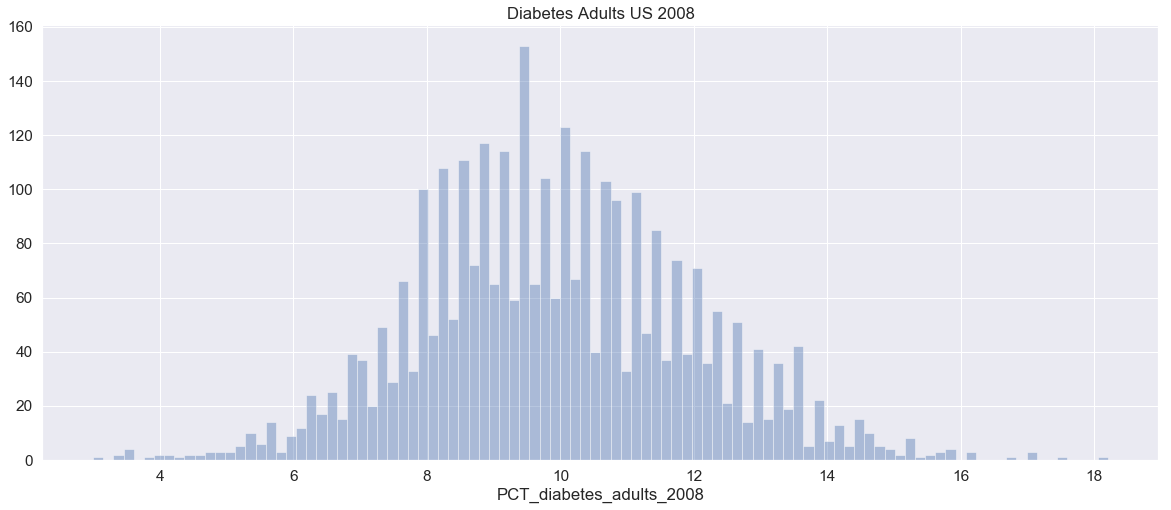

In [10]:
plot_distribution_depricated('Diabetes Adults US 2008', df_diabetes['PCT_diabetes_adults_2008'], 100, 'b')

### Conclusions  
+ The **value fluctuation** between to neighboring bins is extremely high. This results in a **strange comb** structure.  
+ The overall data distribution seems to resemble the (Gaussian) **normal distribution curve**.
+ It seems reasonable to define precise **consider 0.5% bins** in order to stabalize the data.
+ The correct plot function plays an important role in understanding the data.

In [11]:
def plot_distribution(title, series, lower_limit, upper_limit, bin_precision, y_limit, color):
    bins = np.linspace(lower_limit, upper_limit, ((upper_limit - lower_limit) / bin_precision) + 1)
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    plt.xlim(lower_limit, upper_limit)
    plt.ylim(0, y_limit)
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)  

### Histogram Diabetes Adults 2008

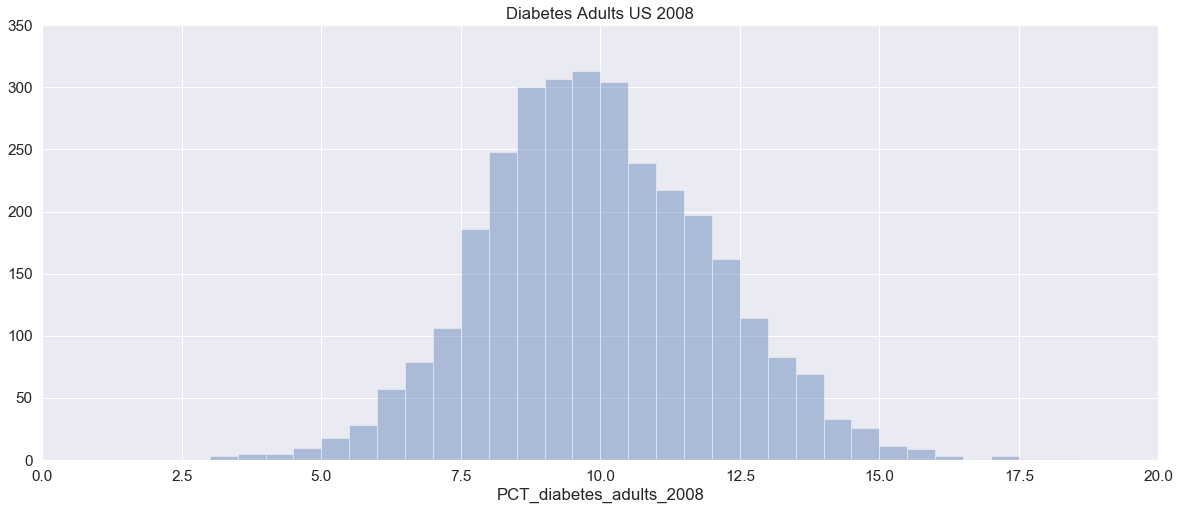

In [12]:
plot_distribution('Diabetes Adults US 2008', df_diabetes['PCT_diabetes_adults_2008'],
                  0, 20, 0.5, 350, 'b')

### Histogram Diabetes Adults 2013

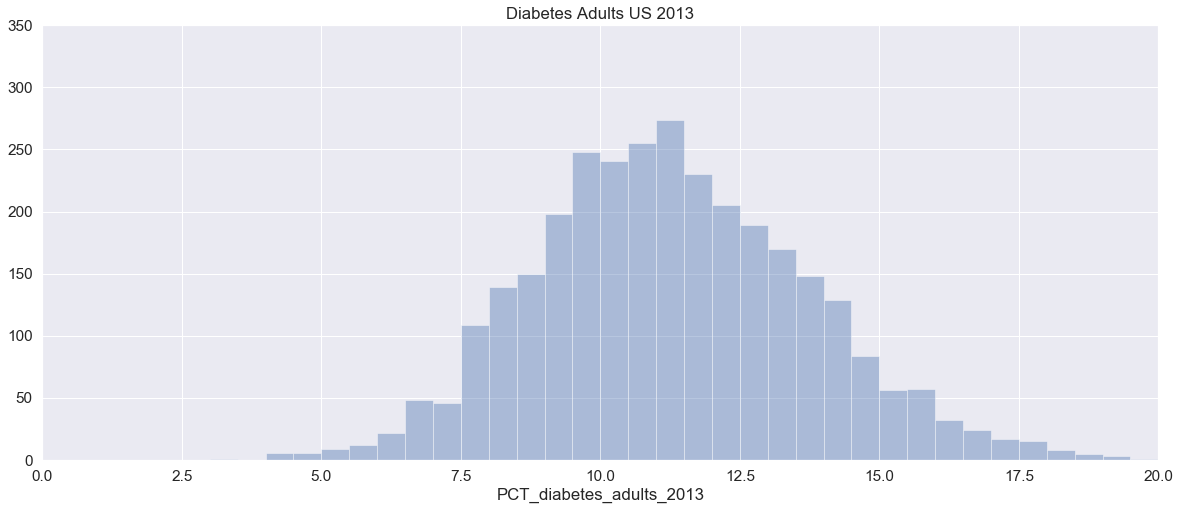

In [13]:
plot_distribution('Diabetes Adults US 2013', df_diabetes['PCT_diabetes_adults_2013'],
                  0, 20, 0.5, 350, 'b')

### Histogram Diabetes Adults Avergage 2008-2013

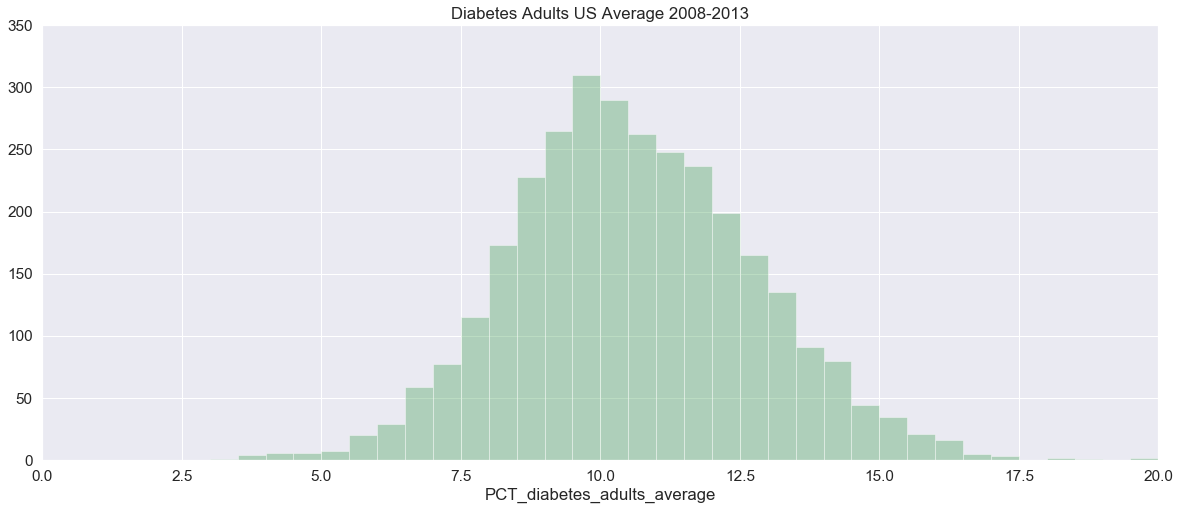

In [14]:
plot_distribution('Diabetes Adults US Average 2008-2013', df_diabetes['PCT_diabetes_adults_average'],
                  0, 20, 0.5, 350, 'g')

### Histogram Diabetes Adults Change 2008-2013

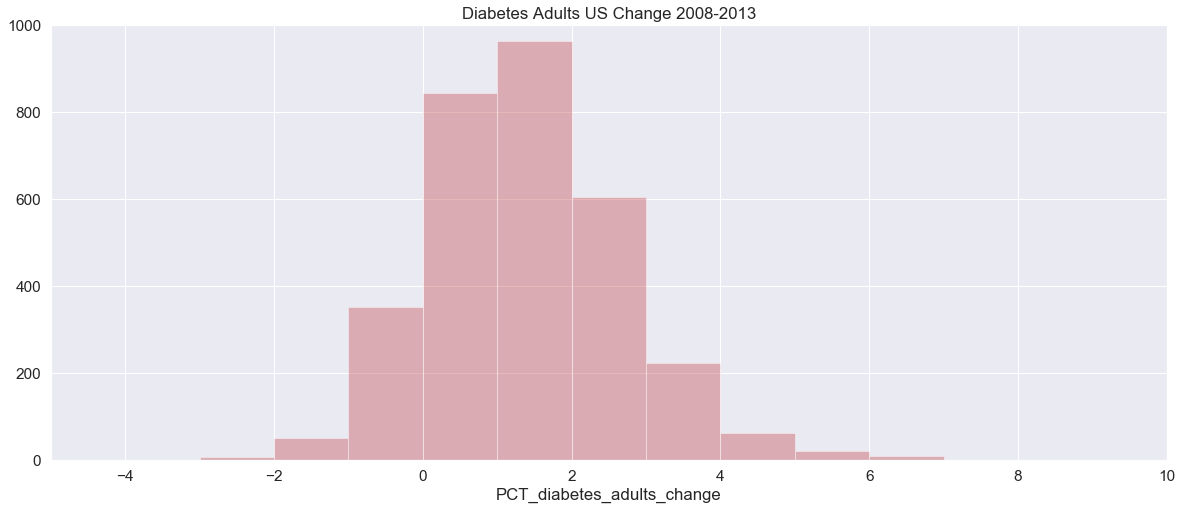

In [15]:
plot_distribution('Diabetes Adults US Change 2008-2013', df_diabetes['PCT_diabetes_adults_change'],
                  -5, 10, 1, 1000, 'r')

# Relate: Obesity 2013 to Diabetes 2013
Plot the obesity data in relation with the diabetis values as a scatter graph.

**Read dataframes** and combine obesity and diabetis refined raw data.

In [16]:
df_obesity = pd.read_csv(path_obesity)
df_diabetes = pd.read_csv(path_diabetes)

In [17]:
df_obese_diabetes = df_obesity[['county_fips','PCT_obese_adults_2013']]
df_obese_diabetes = df_obese_diabetes.merge(df_diabetes[['county_fips','PCT_diabetes_adults_2013']], how='inner', on='county_fips')
df_obese_diabetes[:4]

,county_fips,PCT_obese_adults_2013,PCT_diabetes_adults_2013
0,1001,34.1,13.0
1,1003,27.4,10.4
2,1005,44.4,18.4
3,1007,40.3,14.8


### Relational Graphs 

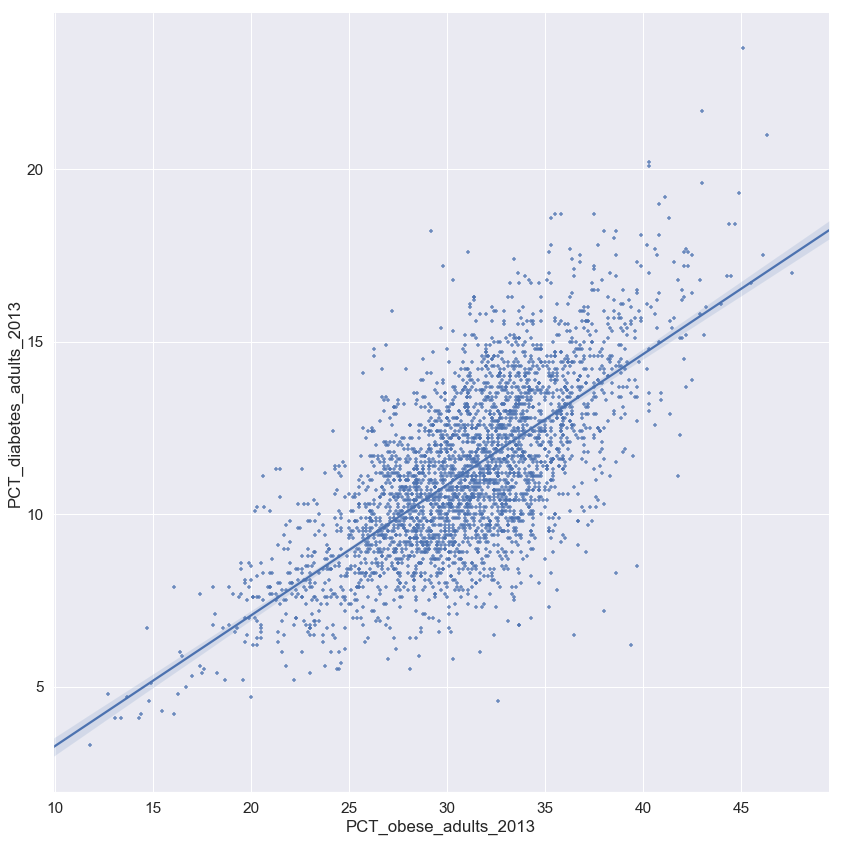

In [34]:
sns.lmplot(x='PCT_obese_adults_2013', y='PCT_diabetes_adults_2013', data=df_obese_diabetes, \
           size=12, markers='+', scatter_kws={"s": 10})

### Conclusions  
+ The scatter graph shows that there is a **positive relation** between obesity and diabetes.
+ This realations is much **stronger than the relation between poverty and obesity**.
+ This was expected as obesity is known as a main cause of diabetes B.
+ This research was used to get an **example of a closely related pair of data sets**.
+ The scatter plot still is not as linear as one would expect. Obesity is just one factor of many for diabetes.

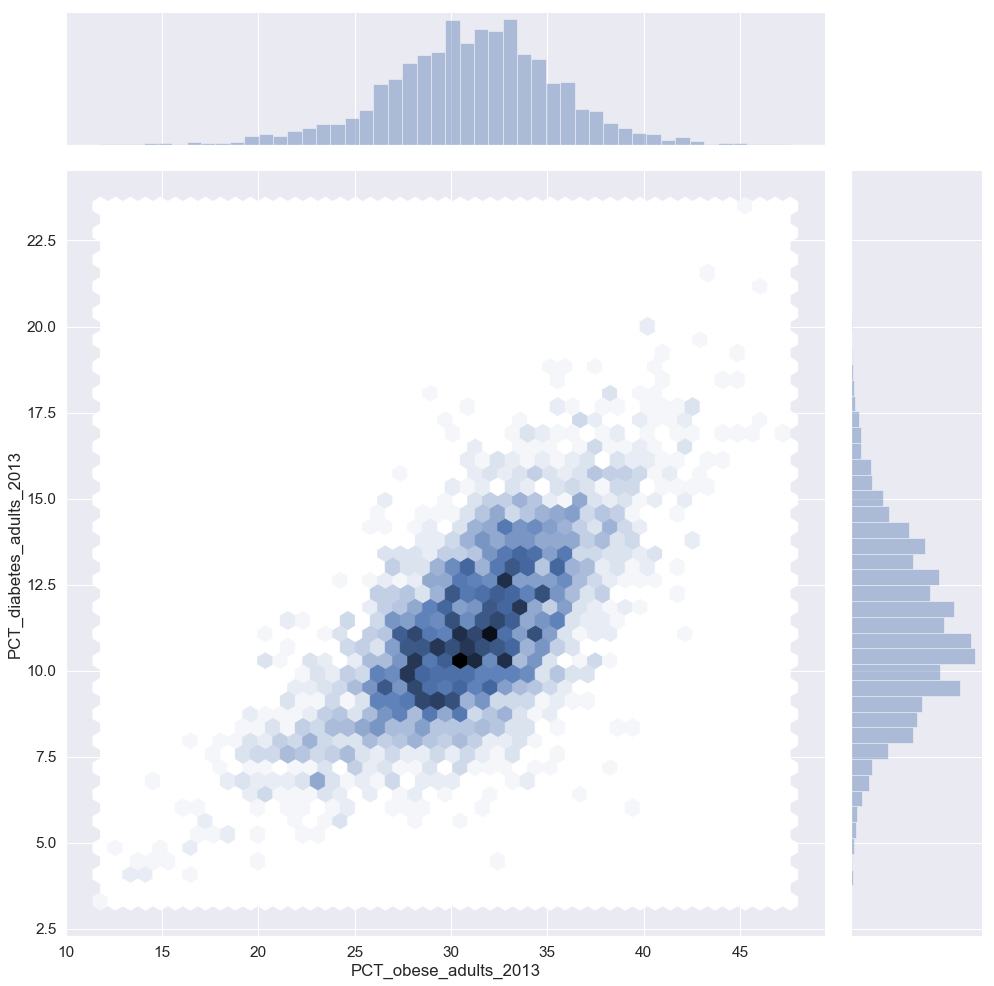

In [40]:
sns.jointplot(x='PCT_obese_adults_2013', y='PCT_diabetes_adults_2013', data=df_obese_diabetes,
              kind='hex', size=14)